## Desafío - Árboles de Regresión
### Camila Vera Villa
#### Septiembre 23,2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lec7_graphs as afx
import seaborn as sns
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from  joblib import load,dump

plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('ggplot')

### Descripción
Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price .

### Ejercicio 1: Preparación del ambiente de trabajo
Importe las librerías clásicas a utilizar.
Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor .
De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [2]:
df = pd.read_csv('ames_housing.csv', header=0).drop('Unnamed: 0', axis =1)

In [3]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Ejercicio 2: Feature engineering
Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object'
o no. Para todas las variables que sean 'object' , realice lo siguiente:
1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan
eliminar una de las categorías, no se concentren en especificar la categoría a eliminar.
Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos.
tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento
artificial del desempeño del modelo.

In [4]:
df.dtypes

MS_SubClass            object
MS_Zoning              object
Lot_Frontage            int64
Lot_Area                int64
Street                 object
Alley                  object
Lot_Shape              object
Land_Contour           object
Utilities              object
Lot_Config             object
Land_Slope             object
Neighborhood           object
Condition_1            object
Condition_2            object
Bldg_Type              object
House_Style            object
Overall_Qual           object
Overall_Cond           object
Year_Built              int64
Year_Remod_Add          int64
Roof_Style             object
Roof_Matl              object
Exterior_1st           object
Exterior_2nd           object
Mas_Vnr_Type           object
Mas_Vnr_Area            int64
Exter_Qual             object
Exter_Cond             object
Foundation             object
Bsmt_Qual              object
                       ...   
Kitchen_AbvGr           int64
Kitchen_Qual           object
TotRms_Abv

In [5]:
df.select_dtypes('object')

,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Partial_Pavement,No_Pool,No_Fence,None,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,No_Fence,Gar2,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,Minimum_Privacy,None,WD,Normal
5,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
6,One_Story_PUD_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Stone_Brook,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
7,One_Story_PUD_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,HLS,AllPub,Inside,Gtl,Stone_Brook,...,Attchd,RFn,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
8,One_Story_PUD_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Stone_Brook,...,Attchd,RFn,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
9,Two_Story_1946_and_Newer,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal


In [6]:
#eliminar una de las categorías opcion 1 solo get dummies
df = pd.get_dummies(df,drop_first=True, prefix=None)
df['Sale_Price']

0       215000
1       105000
2       172000
3       244000
4       189900
5       195500
6       213500
7       191500
8       236500
9       189000
10      175900
11      185000
12      180400
13      171500
14      212000
15      538000
16      164000
17      394432
18      141000
19      210000
20      190000
21      170000
22      216000
23      149000
24      149900
25      142000
26      126000
27      115000
28      184000
29       96000
         ...  
2900    320000
2901    369900
2902    359900
2903     81500
2904    215000
2905    164000
2906    153500
2907     84500
2908    104500
2909    127000
2910    151400
2911    126500
2912    146500
2913     73000
2914     79400
2915    140000
2916     92000
2917     87550
2918     79500
2919     90500
2920     71000
2921    150900
2922    188000
2923    160000
2924    131000
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: Sale_Price, Length: 2930, dtype: int64

In [7]:
#eliminar una de las categorías opcion 2 con concat

#df2 = pd.concat([df.drop(df.select_dtypes('object').columns, axis = 1), pd.get_dummies(df.select_dtypes('object'), drop_first=True, prefix=None)], axis=1)
#df2.head()

In [8]:
#df2['Sale_Price']

## Ejercicio 3: Primer modelo
Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los
atributos de la base de datos como matriz.
Recuerde definir el porcentaje de casos en la muestra de validación y una semilla
pseudoaleatoria.
Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los
hiperparámetros. Reporte las principales métricas de desempeño.
Comente sobre el desempeño.

In [9]:
# Definimos nuestro vector objetivo
y = df['Sale_Price']

# Definimos nuestra matriz de atributos y eliminamos irrelevantes
x = df.drop(columns=['Sale_Price'])

# Generamos muestras de entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33,random_state=25)

In [10]:
# Implementamos nuestro modelo sin modificar hiperparametros
dec_tree_model = DecisionTreeRegressor().fit(x_train, y_train)

In [11]:
df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF',
       ...
       'Sale_Type_ConLw', 'Sale_Type_New', 'Sale_Type_Oth', 'Sale_Type_VWD',
       'Sale_Type_WD ', 'Sale_Condition_AdjLand', 'Sale_Condition_Alloca',
       'Sale_Condition_Family', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=307)

In [12]:
df['Sale_Price']

0       215000
1       105000
2       172000
3       244000
4       189900
5       195500
6       213500
7       191500
8       236500
9       189000
10      175900
11      185000
12      180400
13      171500
14      212000
15      538000
16      164000
17      394432
18      141000
19      210000
20      190000
21      170000
22      216000
23      149000
24      149900
25      142000
26      126000
27      115000
28      184000
29       96000
         ...  
2900    320000
2901    369900
2902    359900
2903     81500
2904    215000
2905    164000
2906    153500
2907     84500
2908    104500
2909    127000
2910    151400
2911    126500
2912    146500
2913     73000
2914     79400
2915    140000
2916     92000
2917     87550
2918     79500
2919     90500
2920     71000
2921    150900
2922    188000
2923    160000
2924    131000
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: Sale_Price, Length: 2930, dtype: int64

In [13]:
y_test

568     222000
462     173000
2586    127000
1303    112500
314     160000
1247    130000
2271    270000
2013    126000
55      216500
718     119000
2662    144000
923     163500
1221    118000
1802    261329
2794    197000
2029    117000
2707    154500
456     552000
2154    285000
2232    141000
2786    149900
824     272500
2783    174000
109     230000
2216    220000
2739    135000
1916    141000
1689    345474
2072    182000
1094    184000
         ...  
2229    200624
2348    188900
259     150000
332      85500
1946    109000
370     260000
1857    213750
1035    111900
2396    281000
1207    155000
1517    179500
2196    165000
206      55000
1449    163000
1104    290000
1139    182000
1392    235000
1107    287500
886     100000
1567    171500
1138    170000
1117    257000
2621    109500
274     155891
2704    157000
2128    235500
2243    140000
2859    230000
1990    145000
1711    281500
Name: Sale_Price, Length: 967, dtype: int64

In [14]:
x_test

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
568,0,3830,2008,2008,280,7,0,1726,1726,1726,...,0,1,0,0,0,0,0,0,0,1
462,48,3480,2003,2003,163,7,0,1405,1405,1405,...,0,0,0,0,1,0,0,0,1,0
2586,55,7700,1956,1956,0,2,0,30,301,1145,...,0,0,0,0,1,0,0,0,1,0
1303,50,6000,1957,1957,0,6,0,620,928,928,...,0,0,0,0,1,0,0,0,1,0
314,0,57200,1948,1950,0,2,334,60,747,1687,...,0,0,0,0,1,0,0,0,1,0
1247,0,12774,1953,1953,0,2,128,232,984,950,...,0,0,0,0,1,0,0,0,1,0
2271,85,14536,2002,2003,236,3,0,316,1616,1629,...,0,0,0,0,1,0,0,0,1,0
2013,0,6240,1938,1950,0,4,0,809,861,861,...,0,0,0,0,1,0,0,0,1,0
55,0,7851,2002,2002,0,3,0,235,860,860,...,0,0,0,0,1,0,0,0,1,0
718,60,3600,1917,2007,0,7,0,624,624,664,...,0,0,0,0,1,0,0,0,1,0


In [15]:
y_hat = dec_tree_model.predict(x_test).shape


In [16]:
print("Test MSE:", mean_squared_error(y_test,dec_tree_model.predict(x_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,dec_tree_model.predict(x_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree_model.predict(x_test)).round(5))

Test MSE: 1512785565.2151
Test MAE: 16750.0
Test R2: 0.76819


La capacidad explicativa del modelo es de un 76%. Para poder emitir un juicio sobre los errores MSE Y MAE, es necesairo compararlo con otro modelo. El cual se hara en las siguientes lineas.

## Ejercicio 4: Importancia relativa
Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price
Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [17]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance][:10])
    plt.yticks(range(len(feat_names)), names, rotation=0)
    


In [18]:
df_importance = pd.DataFrame([x_train.columns, dec_tree_model.feature_importances_]).T
df_importance.columns = ['columna', 'importancia']
df_importance.sort_values(by = 'importancia', inplace = True, ascending = False)

In [19]:
df_importance[df_importance.importancia >0]

,columna,importancia
21,Garage_Cars,0.396034
15,Full_Bath,0.121023
12,Gr_Liv_Area,0.111585
8,Total_Bsmt_SF,0.053516
9,First_Flr_SF,0.0482745
245,Kitchen_Qual_Typical,0.0366169
2,Year_Built,0.0355888
33,Latitude,0.0219684
190,Exter_Qual_Good,0.0177116
127,Overall_Qual_Excellent,0.0137354


In [20]:
df_importance.head(10)

,columna,importancia
21,Garage_Cars,0.396034
15,Full_Bath,0.121023
12,Gr_Liv_Area,0.111585
8,Total_Bsmt_SF,0.053516
9,First_Flr_SF,0.0482745
245,Kitchen_Qual_Typical,0.0366169
2,Year_Built,0.0355888
33,Latitude,0.0219684
190,Exter_Qual_Good,0.0177116
127,Overall_Qual_Excellent,0.0137354


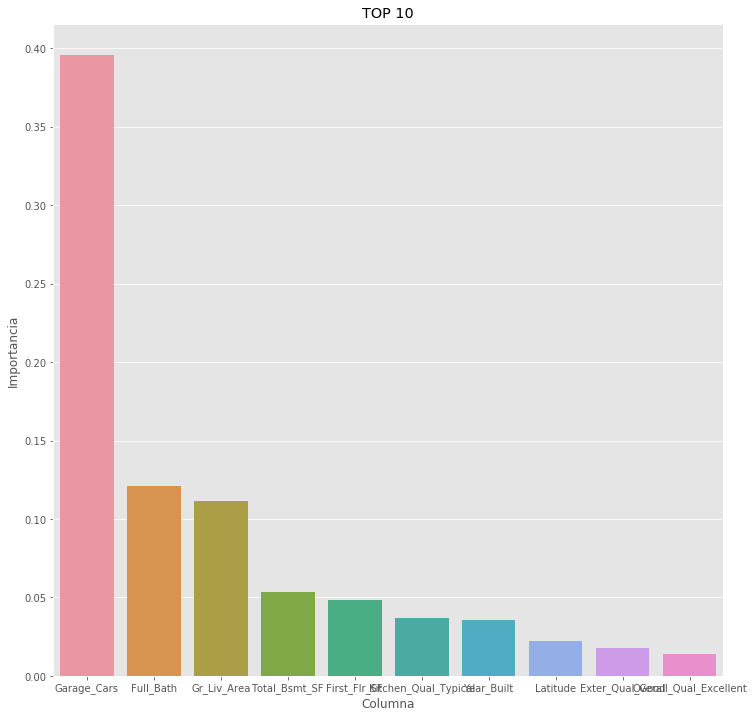

In [21]:
plt.figure(figsize=(12, 12))
sns.barplot(x = 'columna', y = 'importancia', data = df_importance.head(10))
plt.xlabel('Columna');
plt.ylabel('Importancia');
plt.title('TOP 10');

## Ejercicio 5: Refactorización del modelo y pickling
En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de
entrenamiento y validación.
Dentro de los datos de entrenamiento genere una búsqueda de grila con  GridSearchCV
utilizando los siguientes hiperparámetros:
* Máximo de atributos: Evalúe todos los posibles atributos.
* Máximo de profundidad: entre 1 a 32.
* Validaciones cruzadas : 5.
Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

In [34]:
x = df[df_importance.loc[:10,'columna'].values]


In [23]:
df.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF',
       ...
       'Sale_Type_ConLw', 'Sale_Type_New', 'Sale_Type_Oth', 'Sale_Type_VWD',
       'Sale_Type_WD ', 'Sale_Condition_AdjLand', 'Sale_Condition_Alloca',
       'Sale_Condition_Family', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=307)

In [35]:
# generamos subconjuntos específicos para el problema
x = df[df_importance.loc[:10,'columna'].values]
y = df['Sale_Price']
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=.33, random_state=25)

In [36]:
x_tr.to_csv('x_train_cami.csv')
x_te.to_csv('x_test_cami.csv')
y_tr.to_csv('y_train_cami.csv', index = False, header = True)
y_te.to_csv('y_test_cami.csv', index = False,header = True)

In [38]:

grid_cv = GridSearchCV(DecisionTreeRegressor(),
                                {'max_depth': np.linspace(1, 32, 32),
                                'max_features': list(range(1,10))},
                                cv=5,
                                n_jobs=-1).fit(x_tr,y_tr)

medidas de desempeno modelo con gridesearch

In [39]:
print("Test MSE:", mean_squared_error(y_te,grid_cv.best_estimator_.predict(x_te)).round(5))
print("Test MAE:", median_absolute_error(y_te,grid_cv.best_estimator_.predict(x_te)).round(5))
print("Test R2:", r2_score(y_te,grid_cv.best_estimator_.predict(x_te)).round(5))

Test MSE: 1639621973.9322
Test MAE: 17814.28571
Test R2: 0.74876


medidas de desmpeno modelo por defecto

In [41]:
print("Test MSE:", mean_squared_error(y_test,dec_tree_model.predict(x_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,dec_tree_model.predict(x_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree_model.predict(x_test)).round(5))

Test MSE: 1512785565.2151
Test MAE: 16750.0
Test R2: 0.76819


El mejor modelo segun el R2, corresponde al modelo con Gridsearch, ya que lo explica un 76%, a diferencia del modelo por defecto, el cual arroja un 74%.
El modelo con menor promedio de error cuadratico y MAE corresponde tambien al modelo con gridsearch. Por lo tanto en suma, el mejor modelo es el refactorizado con busqueda de grilla.

In [29]:
df.Sale_Price.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [30]:
dump(grid_cv.best_estimator_,'tree_model_cami.joblib')

['tree_model_cami.joblib']

In [31]:
modelo = load('tree_model_cami.joblib')

In [32]:
modelo.get_params()

{'criterion': 'mse',
 'max_depth': 7.0,
 'max_features': 9,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [33]:
modelo.feature_importances_

array([1.16837419e-01, 3.27503611e-01, 1.31151969e-01, 2.13359679e-01,
       1.57458986e-02, 8.69269440e-03, 3.04493782e-02, 1.91770551e-02,
       8.07648774e-03, 0.00000000e+00, 2.29466650e-02, 5.86713683e-03,
       1.12795366e-02, 1.42732565e-04, 8.27854449e-03, 1.36051947e-02,
       3.12961548e-02, 1.60503208e-02, 7.14291191e-03, 9.54912378e-04,
       0.00000000e+00, 1.44009712e-03, 1.00016014e-02])